# Fingerprint Metrics

This file has the following sections:

1. [Testing out metrics](#testing-metrics)
2. [Saving metircs](#saving-metrics-to-csv)
3. [Experiment vs Experiment Type Plotting](#exp-type-plotting)
4. [Backend vs Backend Plotting](#backend-vs-backend-plotting)
5. [Circuit vs Circuit Plotting](#circuits-vs-circuits)

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from csv import DictWriter

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_distances, manhattan_distances


# from investigation_functions import  test_table_funcs as ttf
# from investigation_functions import ml_funcs as mlf
from investigation_functions import ml_visualisation_funcs as mvf

from investigation_functions import similarity_funcs as smlf


## Testing Metrics

In [3]:
n_qubits_list = [4,8,16]
backends_list = ['brisbane','torino','fez','marrakesh']
circuits_list = ['1','2','3']
exp_type_list = ['Hardware', 'Simulation','Refreshed_Simulation']


### Correlations of all runs vs Correlations of means

In [5]:
df1 = pd.read_csv('../Hardware_results/4q/4q_ibm_brisbane1.csv')
df2 = pd.read_csv('../Hardware_results/4q/4q_ibm_brisbane2.csv')
df3 = pd.read_csv('../Hardware_results/4q/4q_ibm_marrakesh3.csv')
# corrs_ax0 = df1.corrwith(df2)
corrs_ax1 = df1.corrwith(df2, axis=1)
corrs3 = df1.corrwith(df3,axis =1)
print(corrs_ax1.mean())
print(corrs3.mean())

# print(rms(corrs_ax1))
# print(rms(corrs3))

0.9999245367222582
0.9950092904336223


In [7]:
df_4q_bris1_summ =pd.read_csv('../Hardware_results/4q/4q_ibm_brisbane1_summarised.csv')
df_4q_bris2_summ =pd.read_csv('../Hardware_results/4q/4q_ibm_brisbane2_summarised.csv')
df_4q_marr1_summ =pd.read_csv('../Hardware_results/4q/4q_ibm_marrakesh1_summarised.csv')

df_4q_bris1_summ_mean = df_4q_bris1_summ['mean']
df_4q_bris2_summ_mean = df_4q_bris2_summ['mean']
df_4q_marr1_summ_mean = df_4q_marr1_summ['mean']

In [ ]:
corr_b12 = df_4q_bris1_summ_mean.corr(df_4q_bris2_summ_mean)
corr_b1_m1 = df_4q_bris1_summ_mean.corr(df_4q_marr1_summ_mean)

print(corr_b12)
print(corr_b1_m1)

0.9999889908235379
0.9544702600392905


### Some Normalized distance metrics

#### Normalised Euclidean Distance
Apparently how you normalise euclidean distance is you normalise the vectors first: (https://stats.stackexchange.com/questions/136232/definition-of-normalized-euclidean-distance)

In [9]:

norm_b1 = smlf.normalize_vector(df_4q_bris1_summ_mean)
norm_b2 = smlf.normalize_vector(df_4q_bris2_summ_mean)
norm_marr1 = smlf.normalize_vector(df_4q_marr1_summ_mean)
norm_euc_b12 = np.linalg.norm(norm_b1 - norm_b2)
norm_euc_b1_m1= np.linalg.norm(norm_b1 - norm_marr1)
print(norm_euc_b12)
print(norm_euc_b1_m1)

0.004252885834243319
0.2715824385007603


#### Normalised MSE:

In [10]:
print(smlf.normalized_mse(df_4q_bris1_summ_mean,df_4q_bris2_summ_mean))
print(smlf.normalized_mse(df_4q_bris1_summ_mean,df_4q_marr1_summ_mean))

2.1500793663519576e-05
0.59935769938254


#### Cosine Distance
(sklearn does normalise)




https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html

In [11]:

print(cosine_distances([df_4q_bris1_summ_mean],[df_4q_bris2_summ_mean])[0][0])
print(cosine_distances([df_4q_bris1_summ_mean],[df_4q_marr1_summ_mean])[0][0])

9.043518959583885e-06
0.03687851045100965


#### Manhattan distances

Using normalised vectors to 'normalise' the manhattan distance


In [12]:
print(smlf.norm_manhatt_dist(norm_b1,norm_b2))
# print(manhatt_dist(norm_b1,norm_b1))
print(smlf.norm_manhatt_dist(norm_b1,norm_marr1))

0.013431583779471276
0.622880664441908


## Saving Metrics to CSV

The normalized metrics are saved in Corr_results/testing but they are not used in this investigation analysis. The un-normalized metrics are saved and used because interpreting their units is easier.

Saving the backend vs backend (bvb) metrics

In [ ]:
dir_corr = "../Fingerprint_results/metric_w_non_norm/"
dir_runs = "../"

# qubits_list = [4,8,16]
# for qubit in qubits_list:
#     file_name = str(qubit)+"q_bvb.csv"
#     # can change 'backends', 'circuits', 'exp_type'
#     tests_list_bvb = get_test_list([qubit], change = 'backends')

#     get_and_record_metrics_from_tests_list(
#         tests_list_bvb,file_name,dir_corr,dir_runs,create_csv=True
#     )

Saving the experiment type vs experiment type metrics

In [ ]:
dir_corr = "../Fingerprint_results/metric_w_non_norm/"
dir_runs = "../"

# qubits_list = [4,8,16]
# for qubit in qubits_list:
#     file_name = str(qubit)+"q_exp_type.csv"
#     # can change 'backends', 'circuits', 'exp_type'
#     tests_list_bvb = get_test_list([qubit], change = 'exp_type')

#     get_and_record_metrics_from_tests_list(
#         tests_list_bvb,file_name,dir_corr,dir_runs,create_csv=True
#     )

Saving the circuit vs circuit (cvc) metrics

In [ ]:
dir_corr = "../Fingerprint_results/metric_w_non_norm/"
dir_runs = "../"

# qubits_list = [4,8,16]
# for qubit in qubits_list:
#     file_name = str(qubit)+"q_cvc.csv"
#     # can change 'backends', 'circuits', 'exp_type'
#     tests_list_bvb = get_test_list([qubit], change = 'circuits')

#     get_and_record_metrics_from_tests_list(
#         tests_list_bvb,file_name,dir_corr,dir_runs,create_csv=True
#     )

## Exp type plotting

Getting data

In [17]:
df_4q_exp_t = pd.read_csv(dir_corr+"4q_exp_type.csv")
df_8q_exp_t = pd.read_csv(dir_corr+"8q_exp_type.csv")
df_16q_exp_t = pd.read_csv(dir_corr+"16q_exp_type.csv")

exp_type_dfs = [df_4q_exp_t,df_8q_exp_t,df_16q_exp_t] 

In [18]:
df_4q_exp_t.head(2)

,nr_qubits,exp_type 1,exp_type 2,backend 1,backend 2,circuit 1,circuit 2,corr avg,cosine d,manhatt d,mse,euclidean d,norm manhatt d,norm mse,norm euclidean d
0,4,Hardware,Simulated,brisbane,brisbane,1,1,0.897576,0.082634,1230.398596,32974.431613,726.354532,0.970855,0.739327,0.406531
1,4,Hardware,Simulated,torino,torino,1,1,0.857609,0.115340,1436.963860,42018.239853,819.934045,0.975563,0.870650,0.480292


In [20]:
exp_dfs = []
for q in exp_type_dfs:
    newq =smlf.combine_cols(q)
    newq = smlf.add_corr_mag(newq)
    exp_dfs.append(newq)

In [21]:
exp_dfs[0].head(2)

,nr_qubits,corr avg,cosine d,manhatt d,mse,euclidean d,norm manhatt d,norm mse,norm euclidean d,exp types,circuits,backends,corr avg mag
0,4,0.897576,0.082634,1230.398596,32974.431613,726.354532,0.970855,0.739327,0.406531,Hardware Simulated,1,brisbane,0.897576
1,4,0.857609,0.115340,1436.963860,42018.239853,819.934045,0.975563,0.870650,0.480292,Hardware Simulated,1,torino,0.857609


### Correlations

Plot by backends

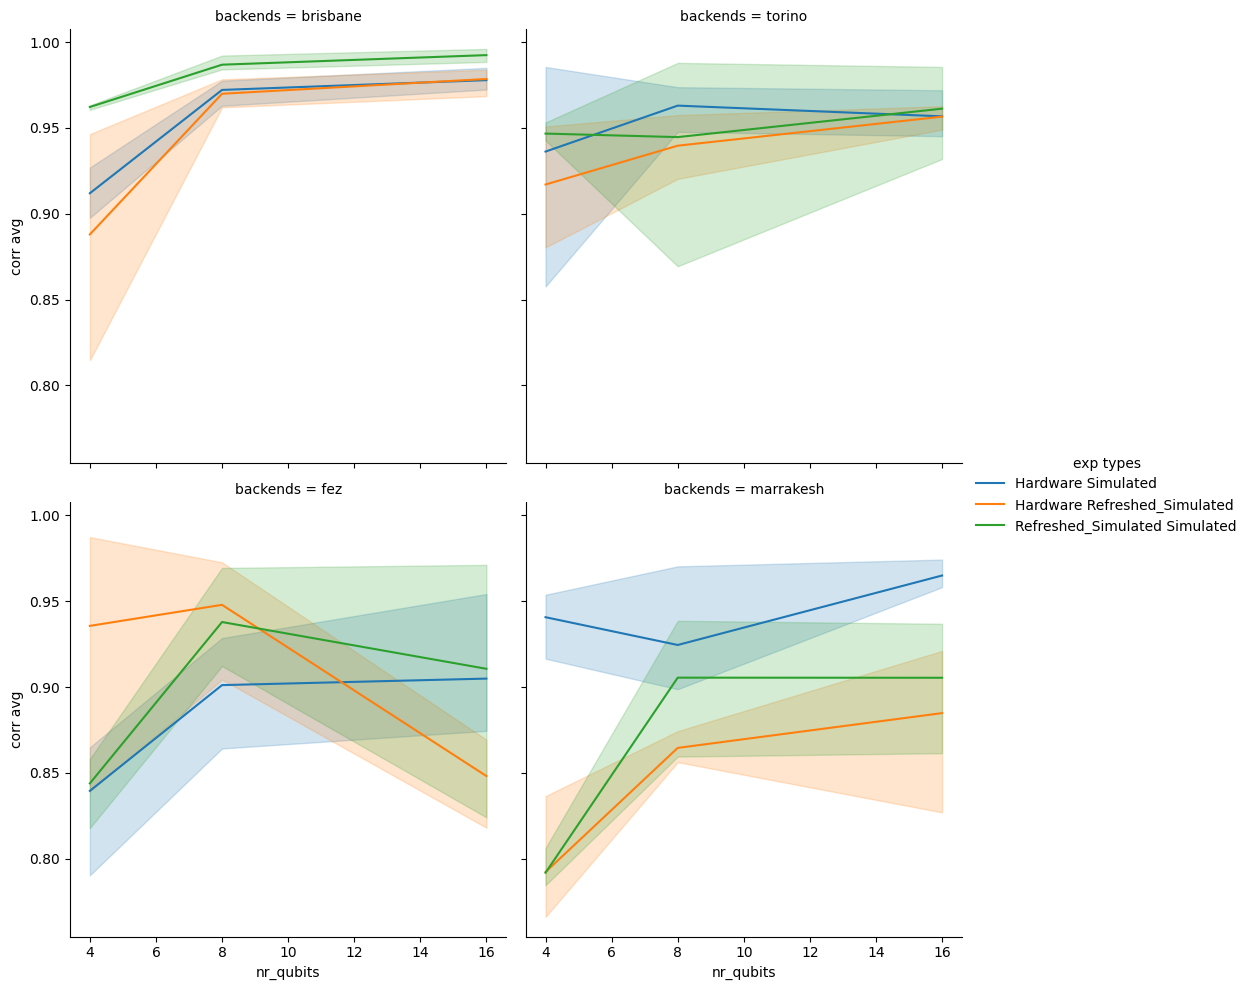

In [22]:
fig = plt.Figure()
# plt.title(label = 'Correlation Average vs Number of Qubits for different Experiment Types and Backends')
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'corr avg',
    hue = 'exp types',
    col = 'backends',
    # row = 'circuits',
    kind = 'line',
    col_wrap = 2,
    height = 5,
    aspect = 1
)


Plot by circuits

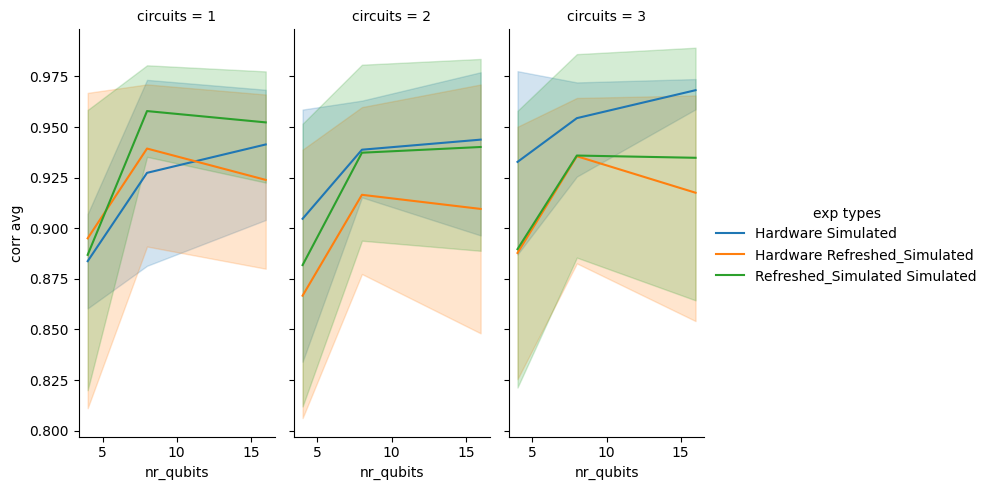

In [23]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'corr avg',
    hue = 'exp types',
    # col = 'backends',
    col = 'circuits',
    kind = 'line',
    height = 5,
    aspect = 0.5
)

Plot by both backends and circuits

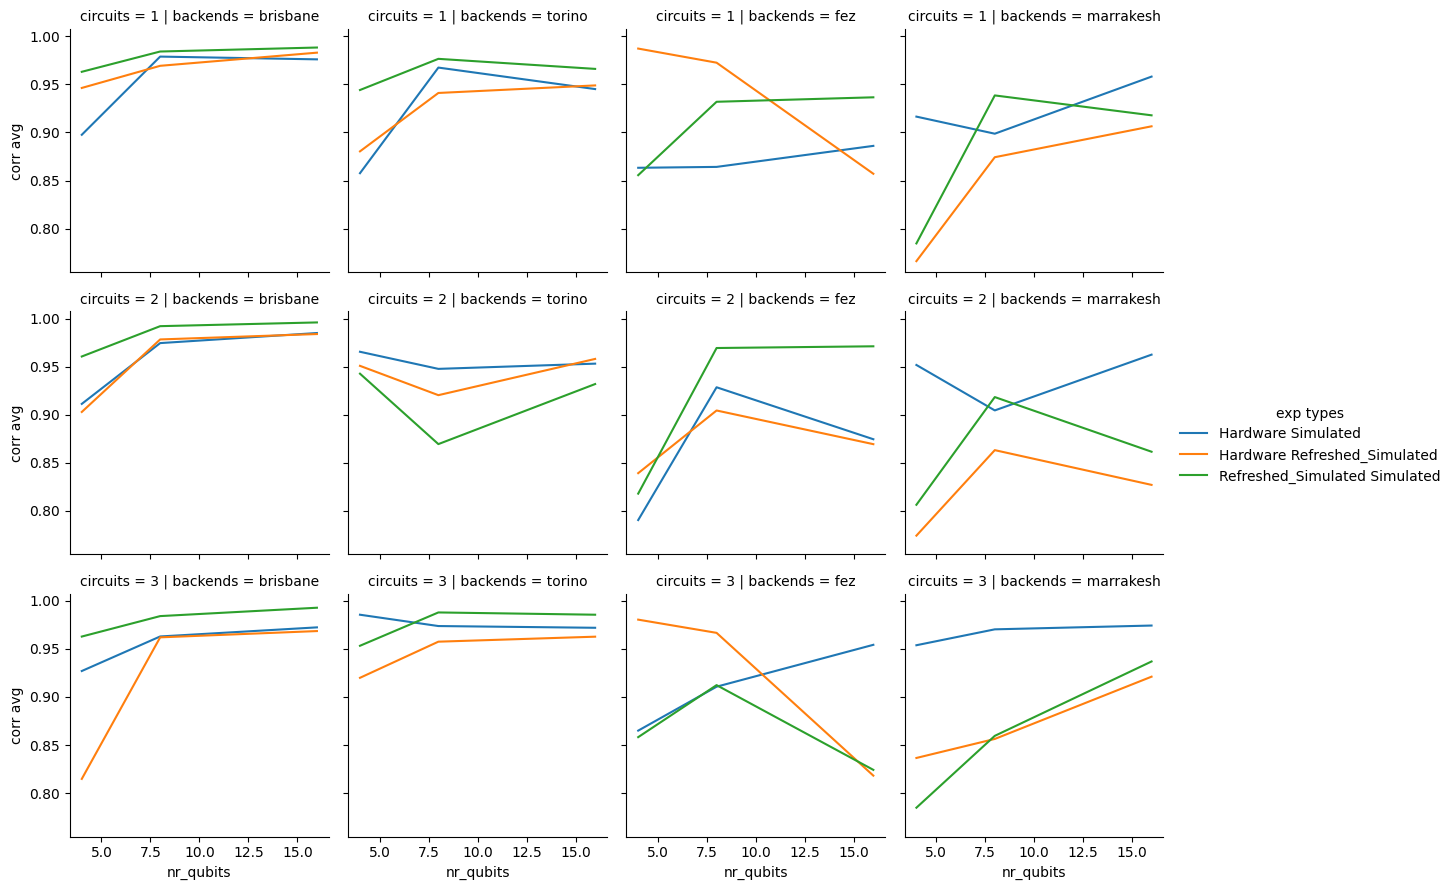

In [24]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'corr avg',
    hue = 'exp types',
    col = 'backends',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

### Euclidean Distance

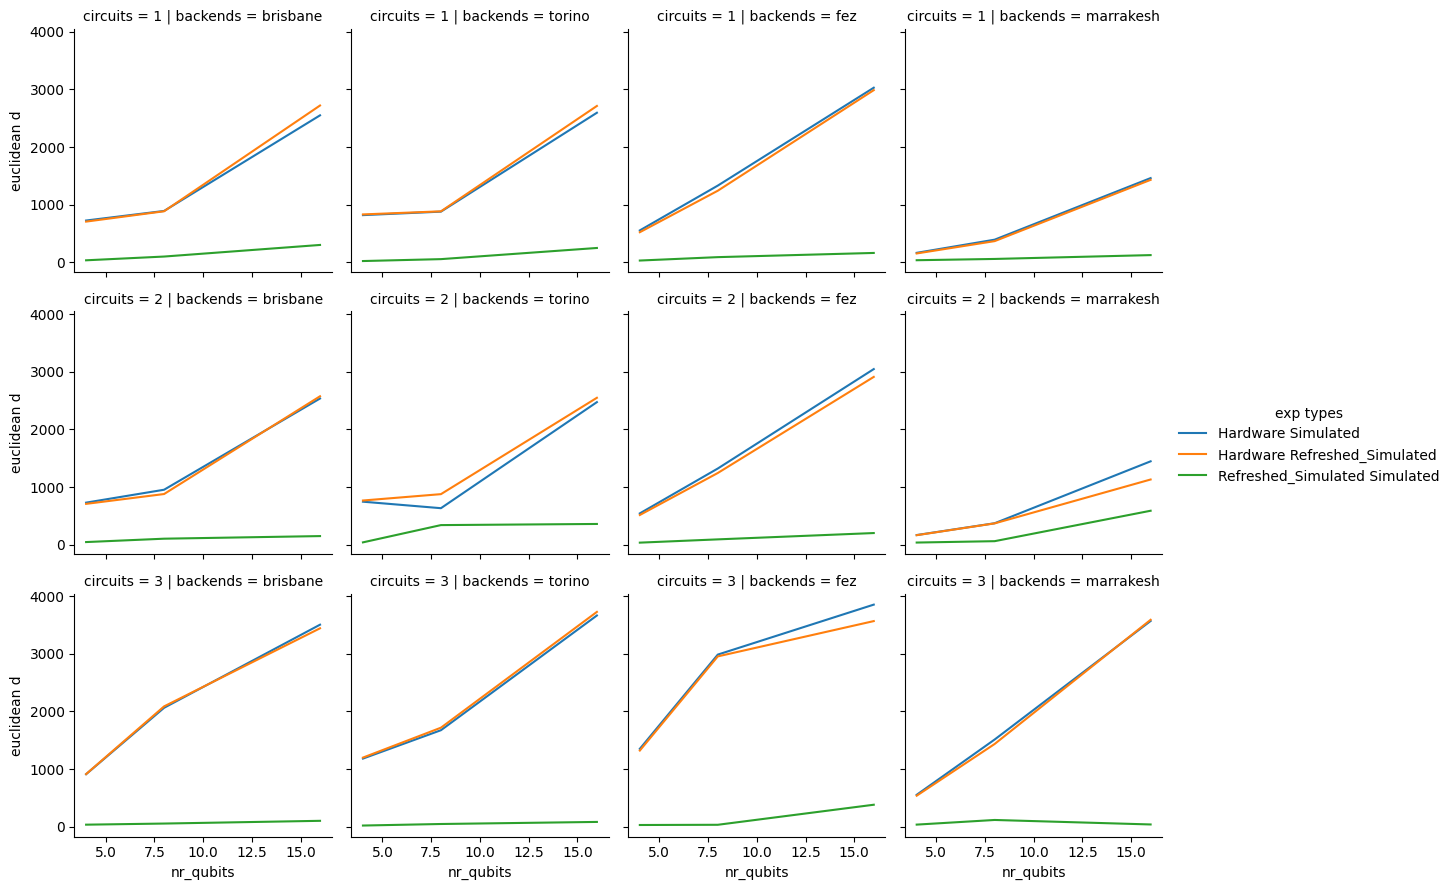

In [25]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'euclidean d',
    hue = 'exp types',
    col = 'backends',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

Printing the values

In [33]:
all_exp =pd.concat(exp_dfs)
avg_exp_by_backend = all_exp.groupby(['exp types','nr_qubits'])['corr avg'].mean()
avg_exp_by_backend.head(50)

exp types                      nr_qubits
Hardware Refreshed_Simulated   4            0.883161
                               8            0.930429
                               16           0.916948
Hardware Simulated             4            0.907026
                               8            0.940117
                               16           0.951041
Refreshed_Simulated Simulated  4            0.886090
                               8            0.943634
                               16           0.942341
Name: corr avg, dtype: float64

In [34]:
avg_exp_by_backend = all_exp.groupby(['exp types','nr_qubits'])['euclidean d'].mean()
avg_exp_by_backend.head(50)

exp types                      nr_qubits
Hardware Refreshed_Simulated   4             695.144892
                               8            1245.541259
                               16           2778.500256
Hardware Simulated             4             703.973301
                               8            1250.993040
                               16           2810.722807
Refreshed_Simulated Simulated  4              33.976774
                               8              96.333269
                               16            228.826281
Name: euclidean d, dtype: float64

### Cosine Distance

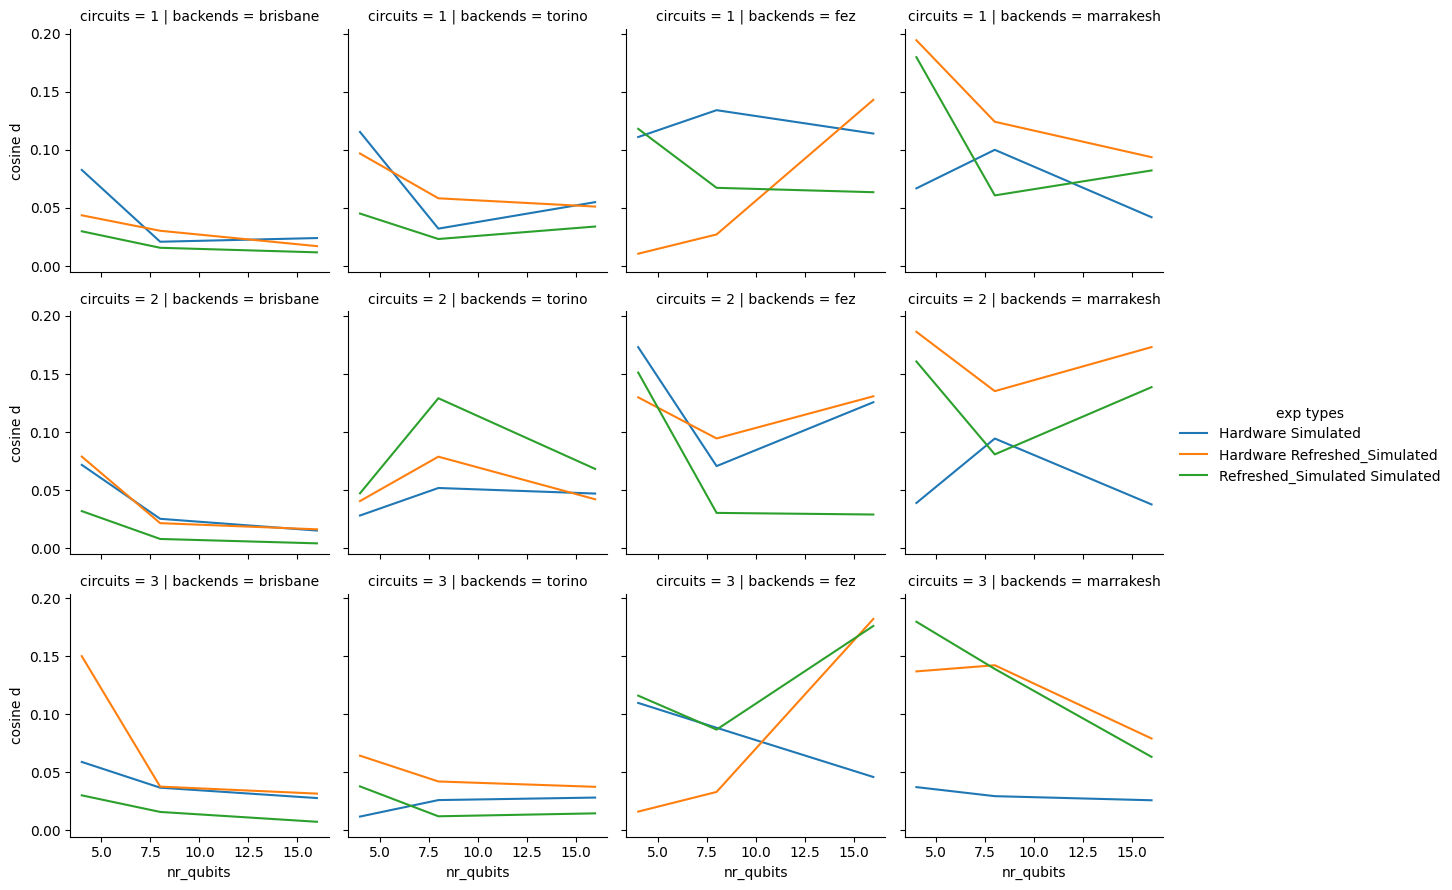

In [25]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'cosine d',
    hue = 'exp types',
    col = 'backends',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

### Manhattan Distance

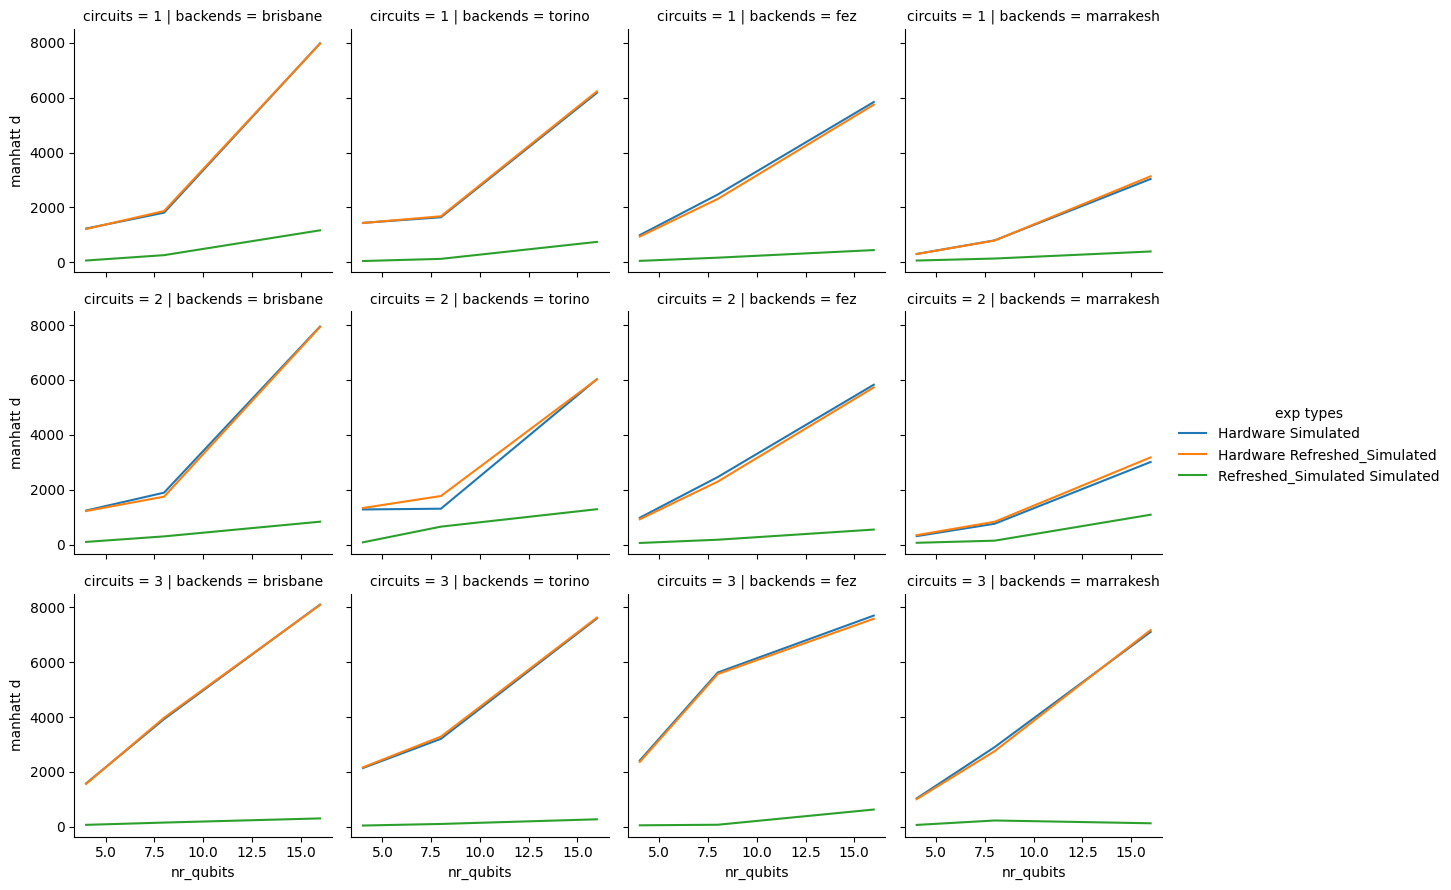

In [26]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'manhatt d',
    hue = 'exp types',
    col = 'backends',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

### Mean Squared Distance

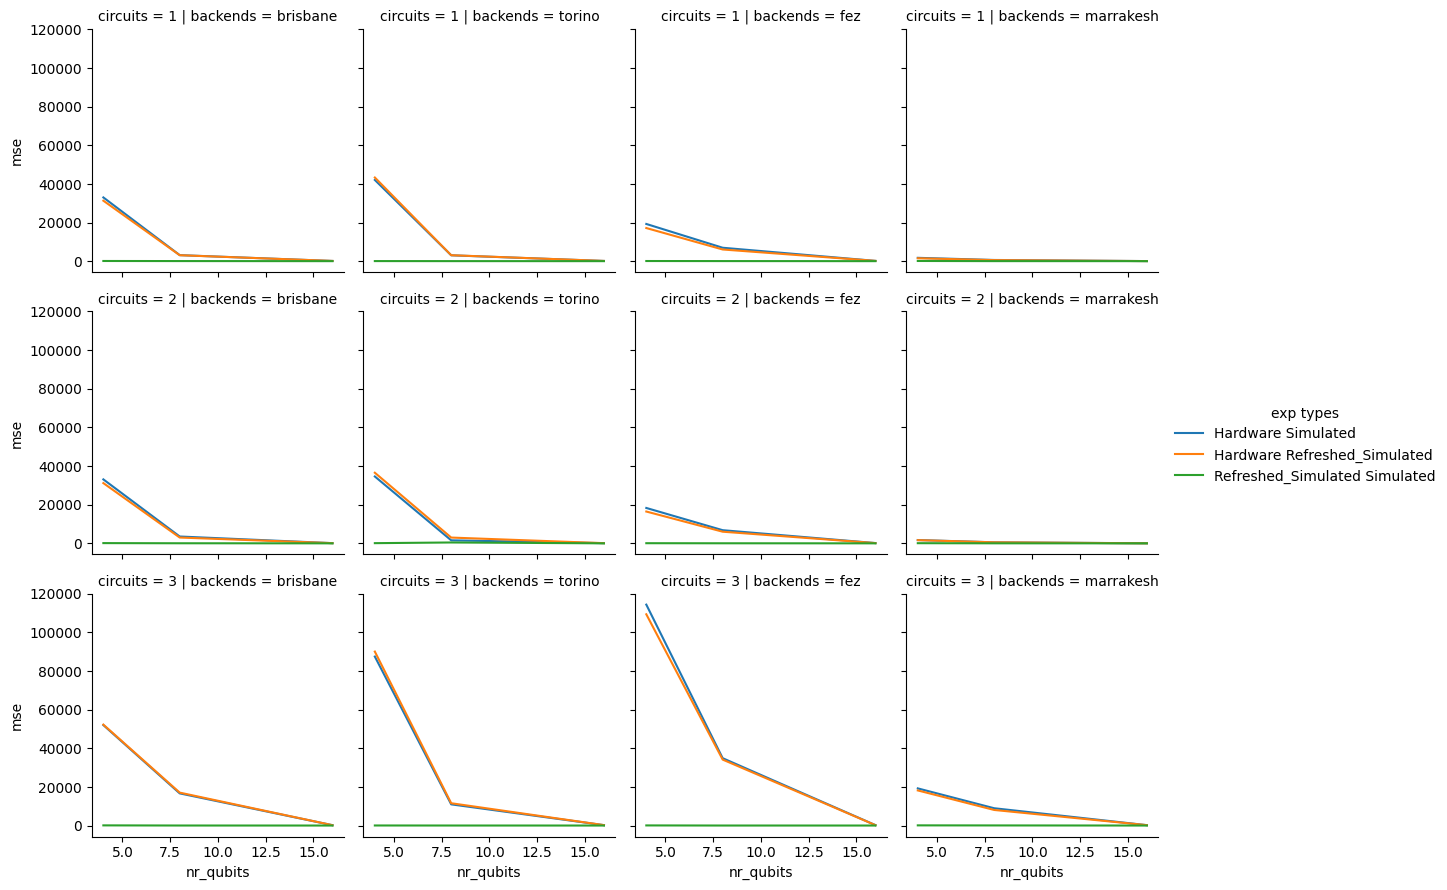

In [27]:
sns.relplot(
    data = pd.concat(exp_dfs),
    x= 'nr_qubits',
    y = 'mse',
    hue = 'exp types',
    col = 'backends',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

## Backend vs Backend plotting

In [36]:
df_4q_bvb = pd.read_csv(dir_corr+"4q_bvb.csv")
df_8q_bvb = pd.read_csv(dir_corr+"8q_bvb.csv")
df_16q_bvb = pd.read_csv(dir_corr+"16q_bvb.csv")

bvb_dfs = [df_4q_bvb,df_8q_bvb,df_16q_bvb] 

bvb_dfs_p = []
for q in bvb_dfs:
    newq =smlf.combine_cols(q)
    newq = smlf.add_corr_mag(newq)
    bvb_dfs_p.append(newq)

all_bvb_p = pd.concat(bvb_dfs_p)

### Correlations

Hue is exp types

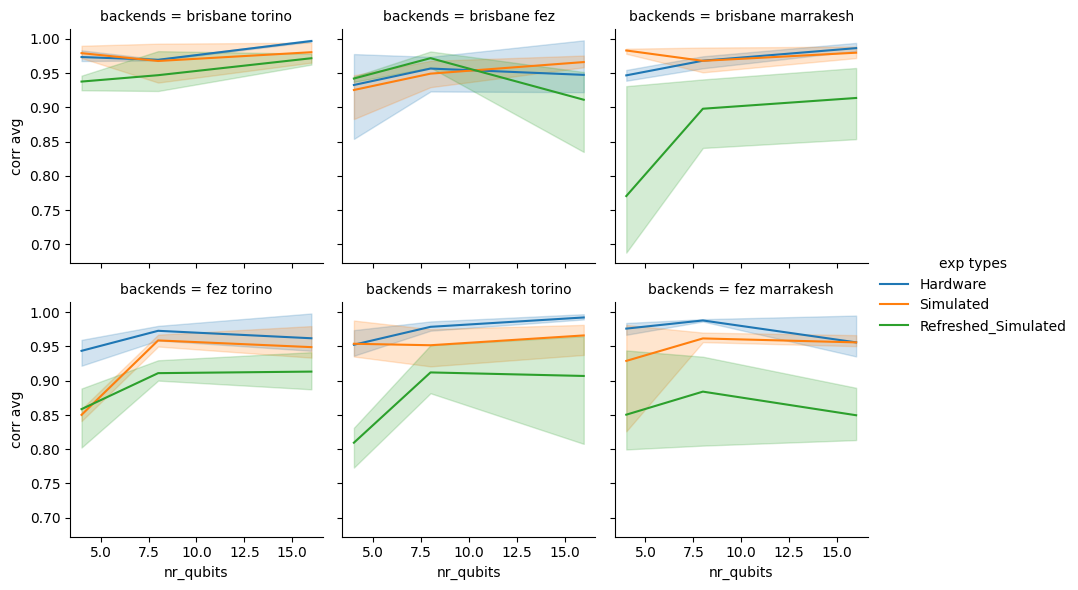

In [29]:
sns.relplot(
    data = pd.concat(bvb_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    col = 'backends',
    col_wrap = 3,
    hue = 'exp types',
    # row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

Hue is Circuits

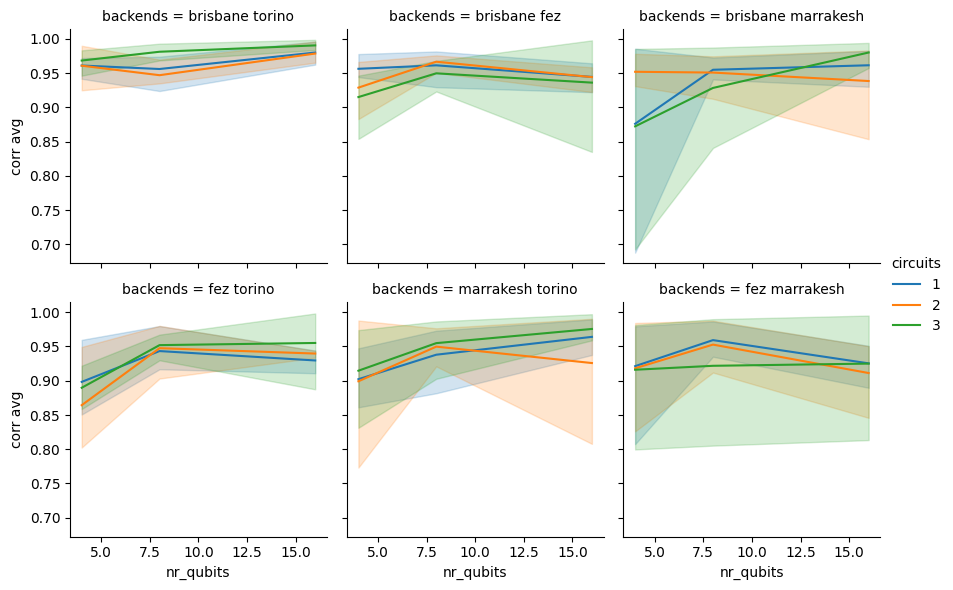

In [30]:
sns.relplot(
    data = pd.concat(bvb_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    col = 'backends',
    col_wrap = 3,
    # hue = 'exp types',
    hue = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

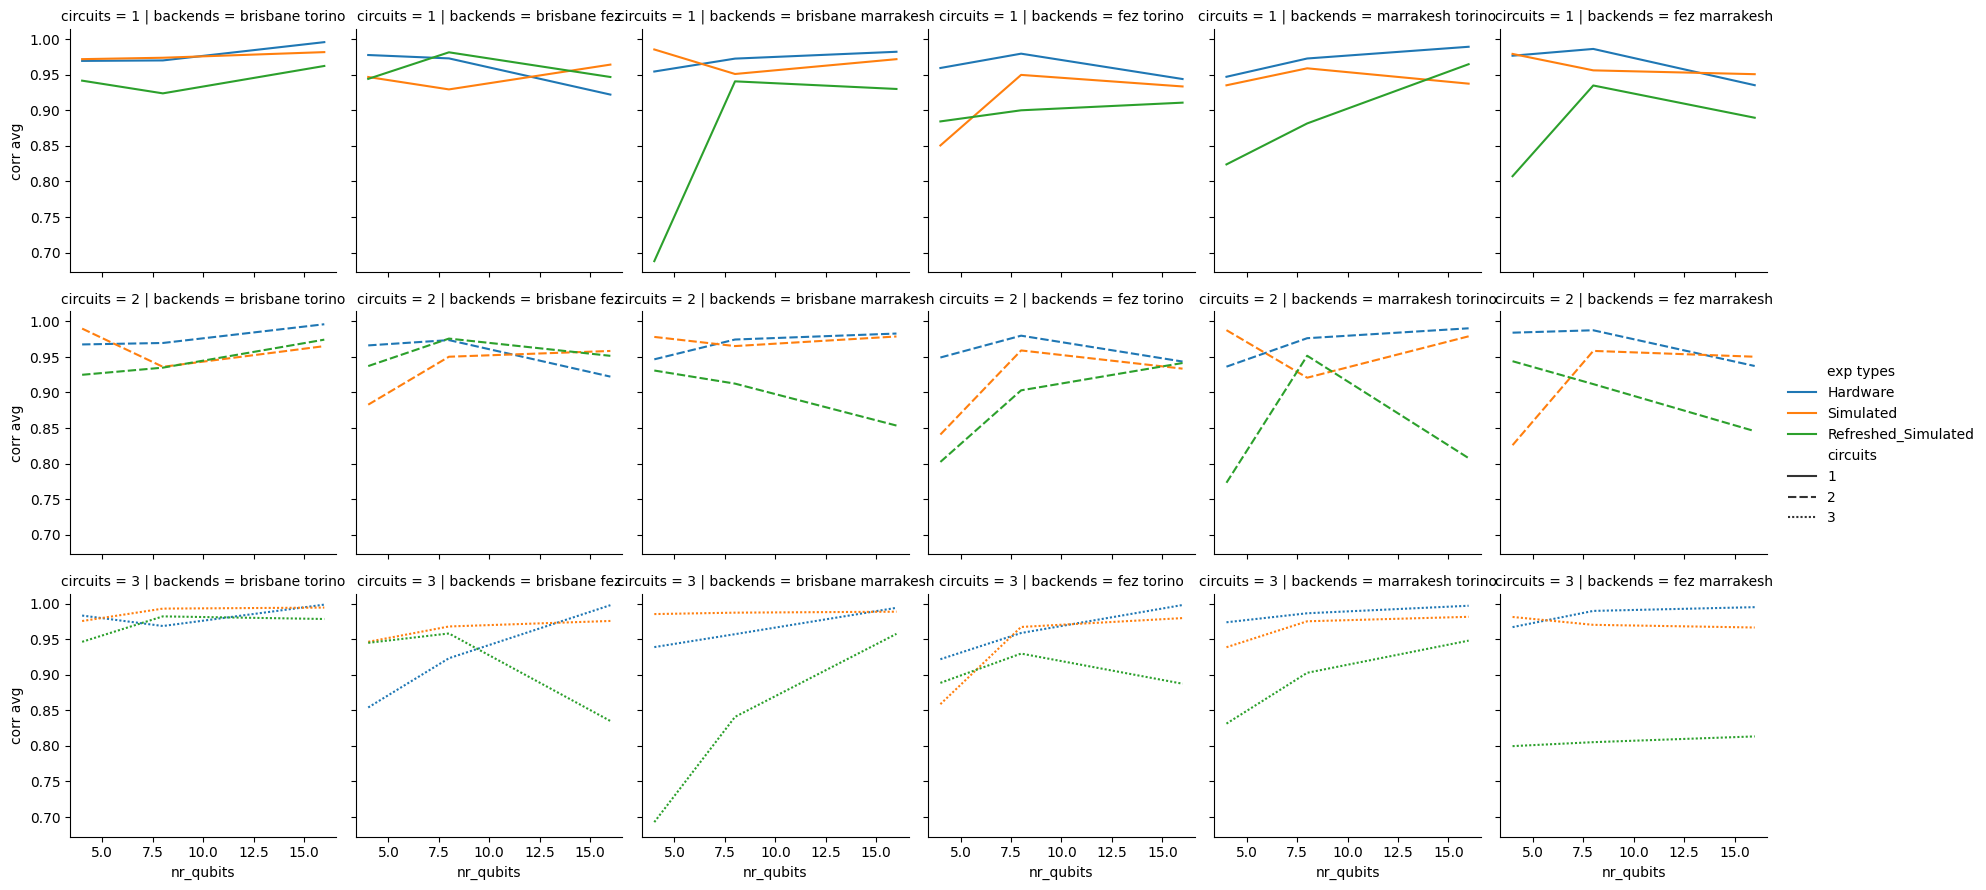

In [31]:
sns.relplot(
    data = pd.concat(bvb_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    col = 'backends',
    # col_wrap = 3,
    hue = 'exp types',
    style ='circuits',
    row = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

Printing Euclidean distance and Correlation to compare

In [39]:
all_bvb_p =pd.concat(bvb_dfs_p)
avg_bvb_by_exp = all_bvb_p.groupby(['exp types','nr_qubits'])['euclidean d'].mean()
avg_bvb_by_exp.head(50)

exp types            nr_qubits
Hardware             4             474.100937
                     8             740.770824
                     16           1197.235913
Refreshed_Simulated  4              69.339519
                     8             224.107591
                     16            566.174447
Simulated            4              69.648199
                     8             262.354644
                     16            634.519898
Name: euclidean d, dtype: float64

In [40]:
all_bvb_p =pd.concat(bvb_dfs_p)
avg_bvb_by_exp = all_bvb_p.groupby(['exp types','nr_qubits'])['corr avg'].mean()
avg_bvb_by_exp.head(50)

exp types            nr_qubits
Hardware             4            0.954013
                     8            0.972116
                     16           0.973331
Refreshed_Simulated  4            0.861348
                     8            0.920531
                     16           0.910928
Simulated            4            0.936607
                     8            0.959362
                     16           0.966086
Name: corr avg, dtype: float64

### Only Hardware

In [33]:
H_all_bvb =all_bvb_p[all_bvb_p['exp types']=='Hardware']
H_all_bvb.head()


,nr_qubits,corr avg,cosine d,manhatt d,mse,euclidean d,norm manhatt d,norm mse,norm euclidean d,exp types,circuits,backends,corr avg mag
0,4,0.969388,0.024852,418.596491,2378.165243,195.065742,0.464868,0.053321,0.222944,Hardware,1,brisbane torino,0.969388
1,4,0.977661,0.018119,598.224561,6018.407398,310.313581,0.435503,0.134940,0.190365,Hardware,1,brisbane fez,0.977661
2,4,0.954470,0.036879,1101.464561,26731.729997,653.993639,0.622881,0.599358,0.271582,Hardware,1,brisbane marrakesh,0.954470
3,4,0.959430,0.032805,736.750175,8237.184902,363.035754,0.521209,0.170681,0.256143,Hardware,1,fez torino,0.959430
4,4,0.947075,0.042781,1190.842807,29702.087720,689.371746,0.749263,0.615450,0.292509,Hardware,1,marrakesh torino,0.947075


In [34]:

df_H = H_all_bvb.melt(['nr_qubits','circuits','backends','exp types'], var_name='metrics', value_name='vals')
df_H.head()

,nr_qubits,circuits,backends,exp types,metrics,vals
0,4,1,brisbane torino,Hardware,corr avg,0.969388
1,4,1,brisbane fez,Hardware,corr avg,0.977661
2,4,1,brisbane marrakesh,Hardware,corr avg,0.954470
3,4,1,fez torino,Hardware,corr avg,0.959430
4,4,1,marrakesh torino,Hardware,corr avg,0.947075


#### Correlation

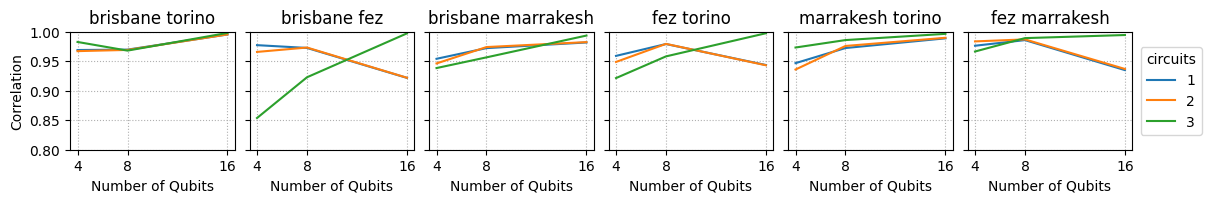

In [ ]:
axs =mvf.make_line_plots(
    H_all_bvb, fig_size_=(12,2), y_lim=(0.8,1),share_y=True,
    y_label="Correlation"
    # grid=False
    )

#### Euclidean distance

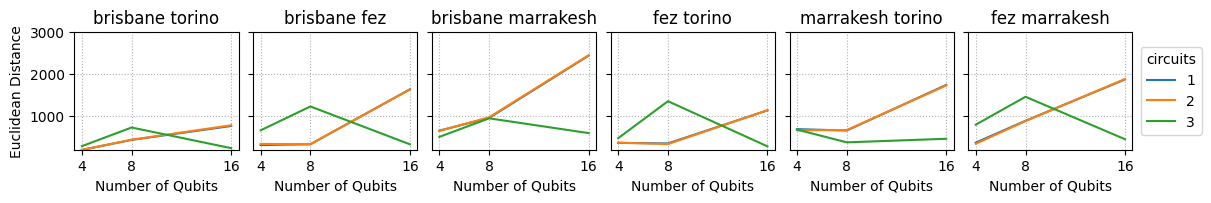

In [ ]:
axs =mvf.make_line_plots(
    H_all_bvb, y = 'euclidean d',
    y_label = 'Euclidean Distance',
    y_lim=(200,3000),
    grid = True
)

#### Mean Squared Distance

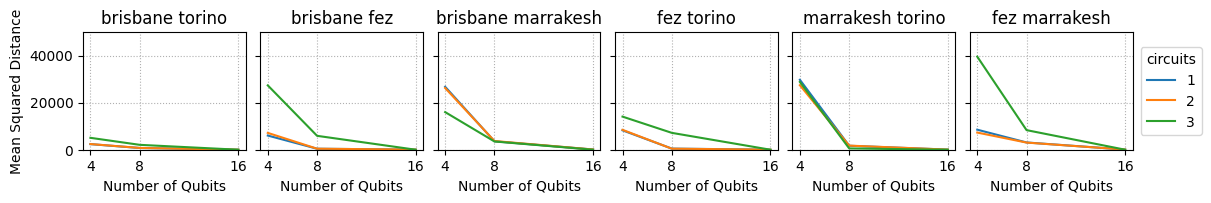

In [ ]:
axs =mvf.make_line_plots(
    H_all_bvb, y = 'mse',
    y_label = 'Mean Squared Distance',
    y_lim=(0,50000),
    grid = True
)

#### Manhattan Distance

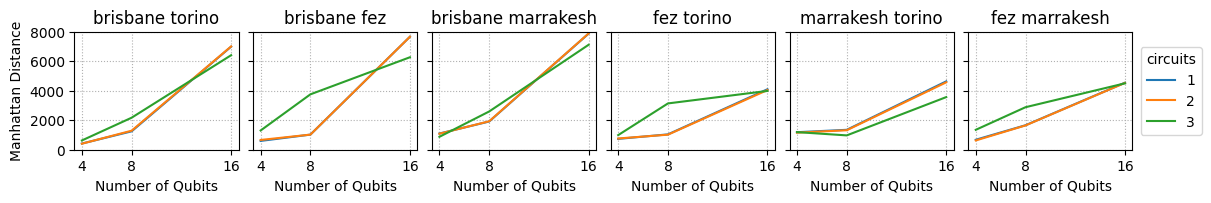

In [ ]:
axs =mvf.make_line_plots(
    H_all_bvb, y = 'manhatt d',
    y_label = 'Manhattan Distance',
    y_lim=(0,8000),
    grid = True
)

#### Cosine distance

Text(0.5, 1.05, 'Hardware Backend vs Backend Cosine Distance')

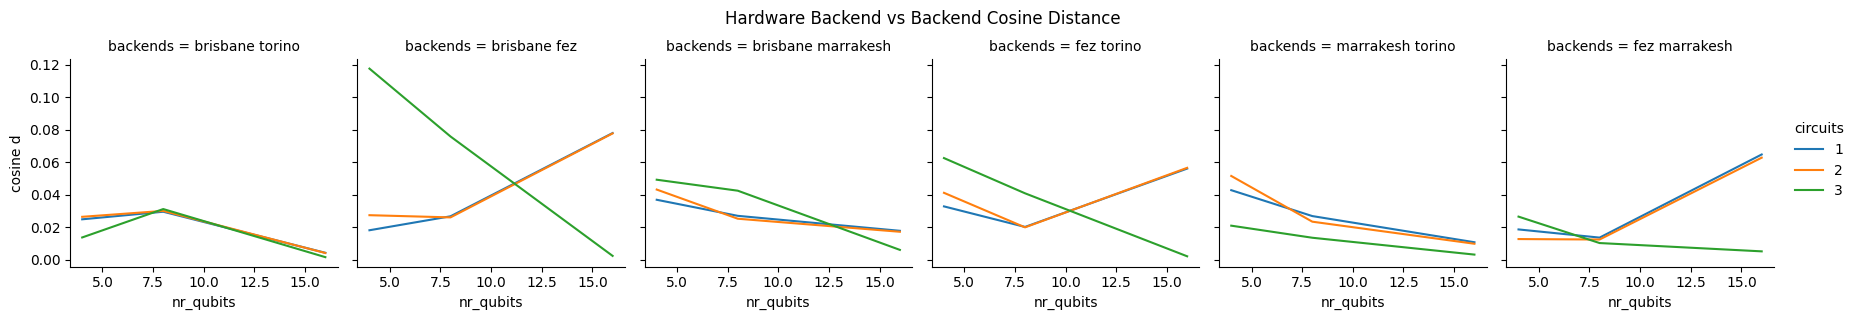

In [39]:
ax=sns.relplot(
    data = H_all_bvb,
    x= 'nr_qubits',
    y = 'cosine d',
    # col = 'exp types',
    # col_wrap = 3,
    # row = 'circuits',
    col = 'backends',
    hue = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1,
)
plt.suptitle('Hardware Backend vs Backend Cosine Distance',y = 1.05)

#### All metrics

Text(0.5, 1.05, 'Hardware Backend vs Backend DIstance Metrics')

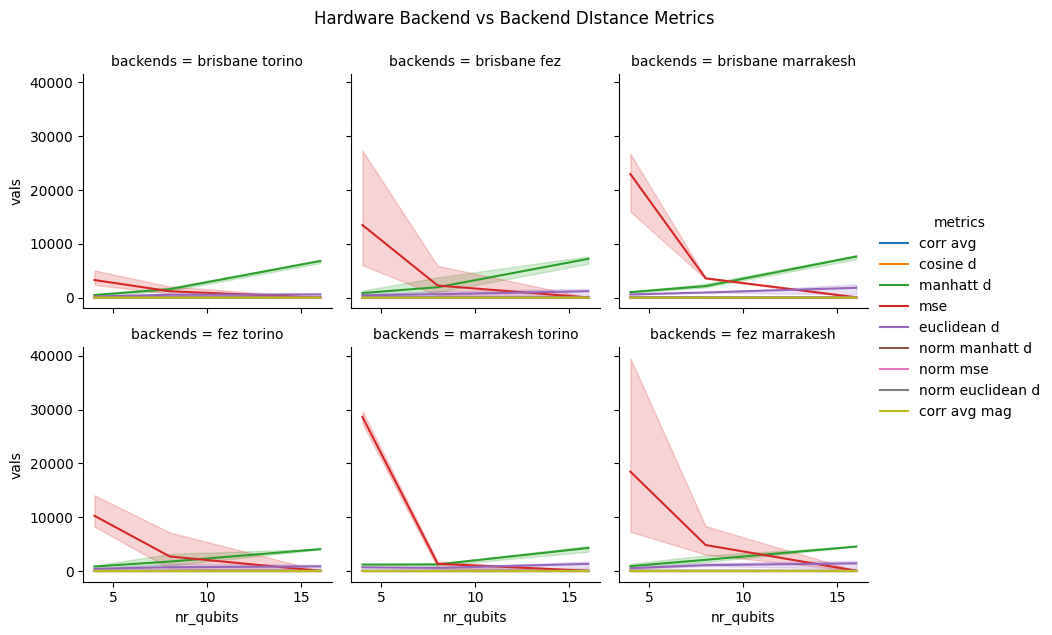

In [40]:
ax=sns.relplot(
    data = df_H,
    x= 'nr_qubits',
    y = 'vals',
    # col = 'exp types',
    col_wrap = 3,
    # row = 'circuits',
    col = 'backends',
    hue = 'metrics',
    kind = 'line',
    height = 3,
    aspect = 1,
)
plt.suptitle('Hardware Backend vs Backend DIstance Metrics',y = 1.05)

Text(0.5, 1.05, 'Hardware Backend vs Backend DIstance Metrics')

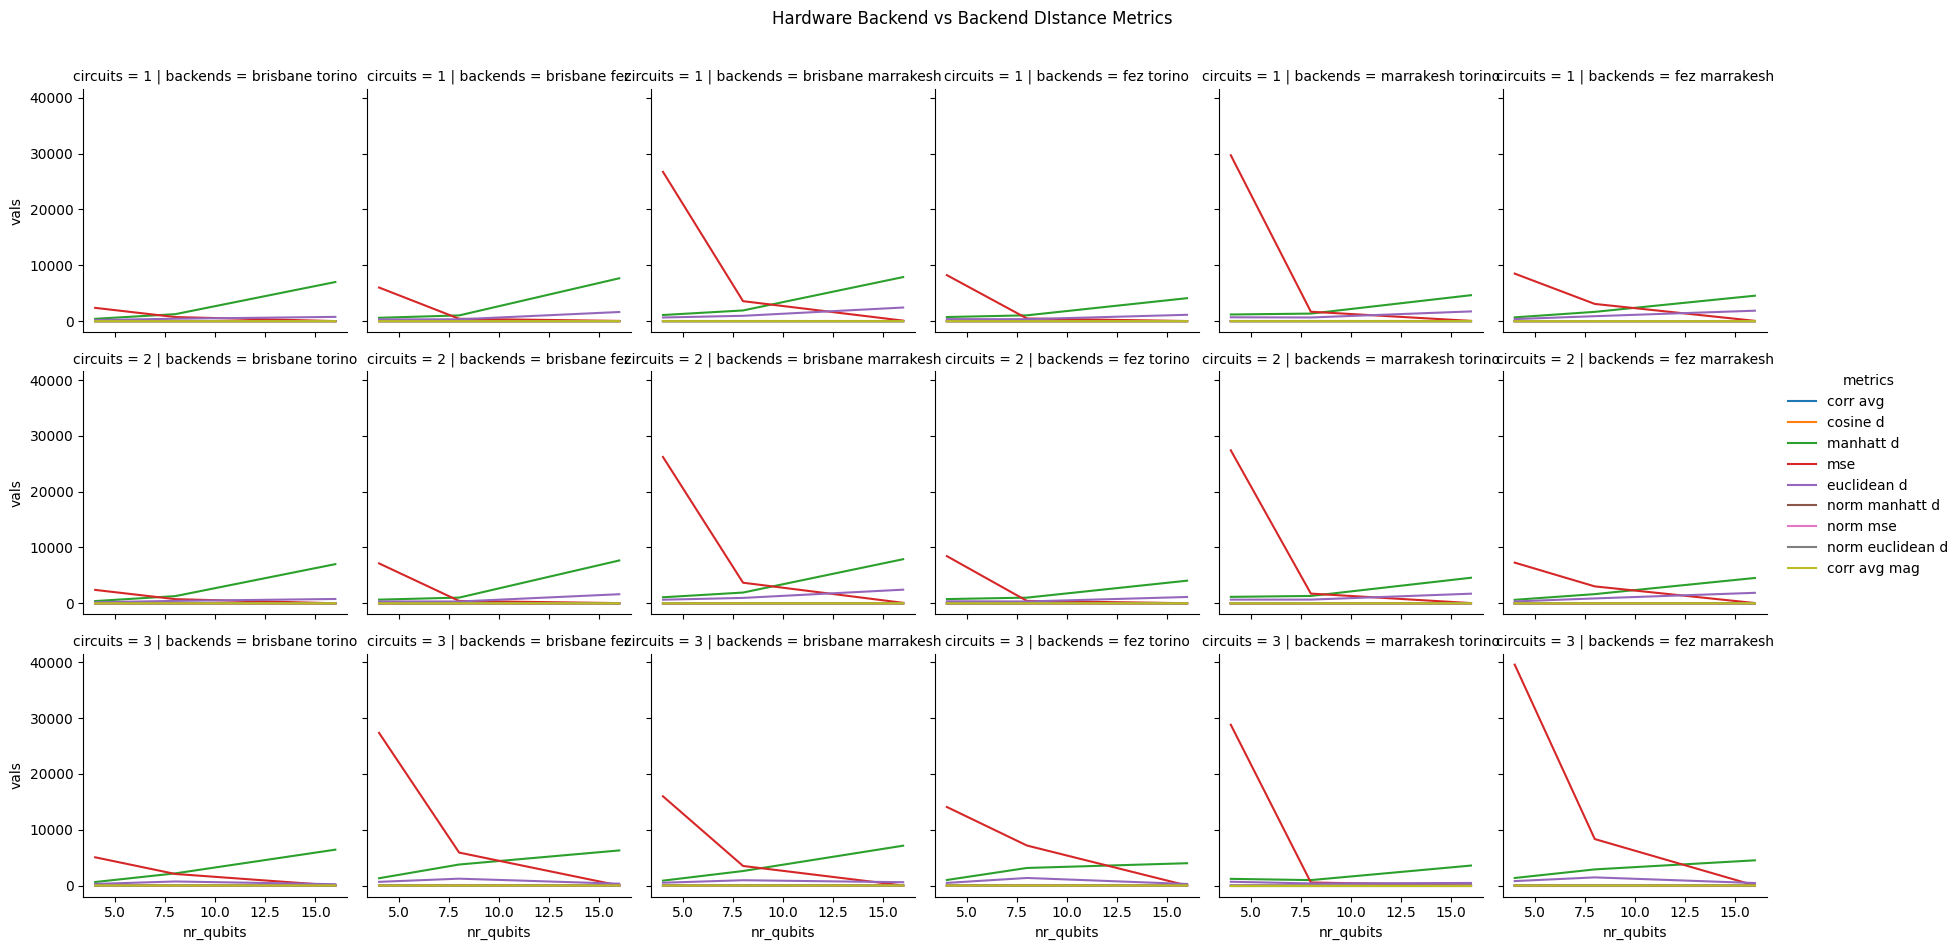

In [42]:

ax=sns.relplot(
    data = df_H,
    x= 'nr_qubits',
    y = 'vals',
    # col = 'exp types',
    # col_wrap = 3,
    row = 'circuits',
    col = 'backends',
    hue = 'metrics',
    kind = 'line',
    height = 3,
    aspect = 1,
)
plt.suptitle('Hardware Backend vs Backend DIstance Metrics',y = 1.05)

## Circuits vs Circuits

In [ ]:
df_4q_cvc = pd.read_csv(dir_corr+"4q_cvc.csv")
df_8q_cvc = pd.read_csv(dir_corr+"8q_cvc.csv")
df_16q_cvc = pd.read_csv(dir_corr+"16q_cvc.csv")

cvc_dfs = [df_4q_cvc,df_8q_cvc,df_16q_cvc] 

cvc_dfs_p = []
for q in cvc_dfs:
    newq =smlf.combine_cols(q)
    newq = smlf.add_corr_mag(newq)
    cvc_dfs_p.append(newq)

### Correlations

Hue is experiment types

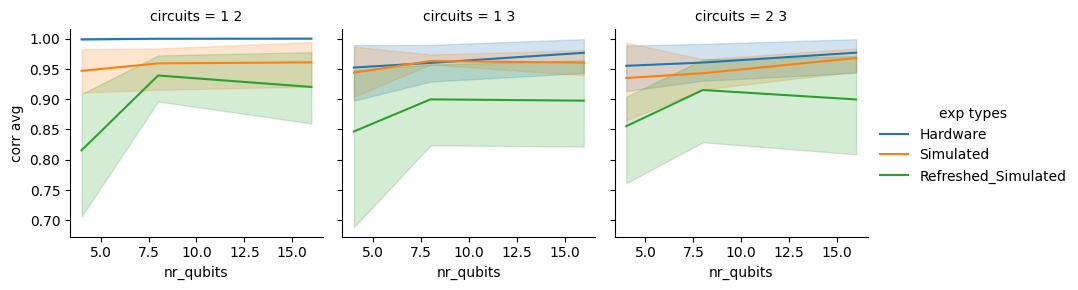

In [44]:
sns.relplot(
    data = pd.concat(cvc_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    # col = 'backends',
    col_wrap = 3,
    hue = 'exp types',
    col = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

Try isolate Hardware results

(0.9, 1.0)

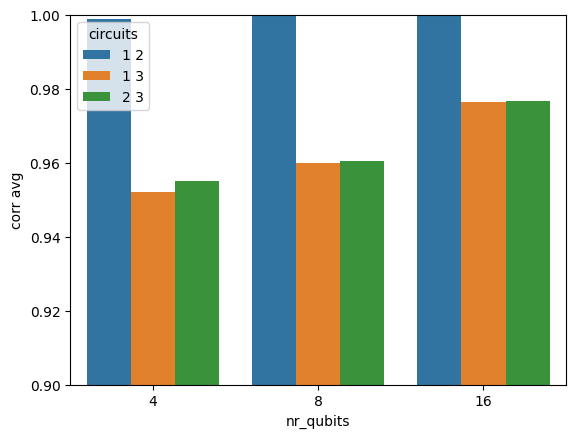

In [48]:
cvcs = pd.concat(cvc_dfs_p)
sns.barplot(
    data = cvcs[cvcs['exp types']=='Hardware'],
    x= 'nr_qubits',
    y = 'corr avg',
    # col = 'backends',
    # col_wrap = 3,
    hue = 'circuits',
    errorbar=None,
    # col = 'circuits',
    # kind = 'line',
    # height = 3,
    # aspect = 1
)
plt.ylim((0.9,1))

In [51]:
cvcs_H =cvcs[cvcs['exp types']=='Hardware']


In [57]:
avg_over_backends = cvcs_H.groupby(['circuits','nr_qubits'])['corr avg'].mean()
avg_over_backends.head(10)

circuits  nr_qubits
1 2       4            0.998829
          8            0.999791
          16           0.999959
1 3       4            0.952210
          8            0.959865
          16           0.976540
2 3       4            0.955065
          8            0.960442
          16           0.976766
Name: corr avg, dtype: float64

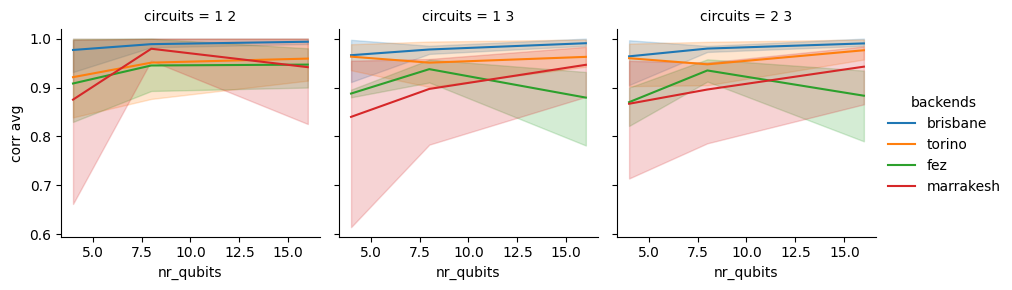

In [41]:
sns.relplot(
    data = pd.concat(cvc_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    # col = 'backends',
    col_wrap = 3,
    hue = 'backends',
    col = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

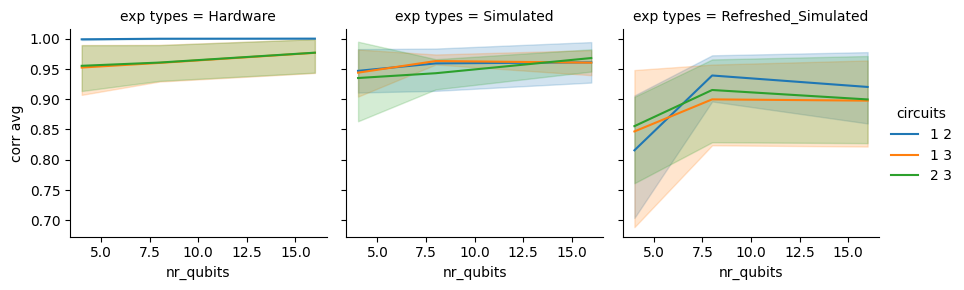

In [42]:
sns.relplot(
    data = pd.concat(cvc_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    # row = 'backends',
    # col_wrap = 3,
    col = 'exp types',
    hue = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)

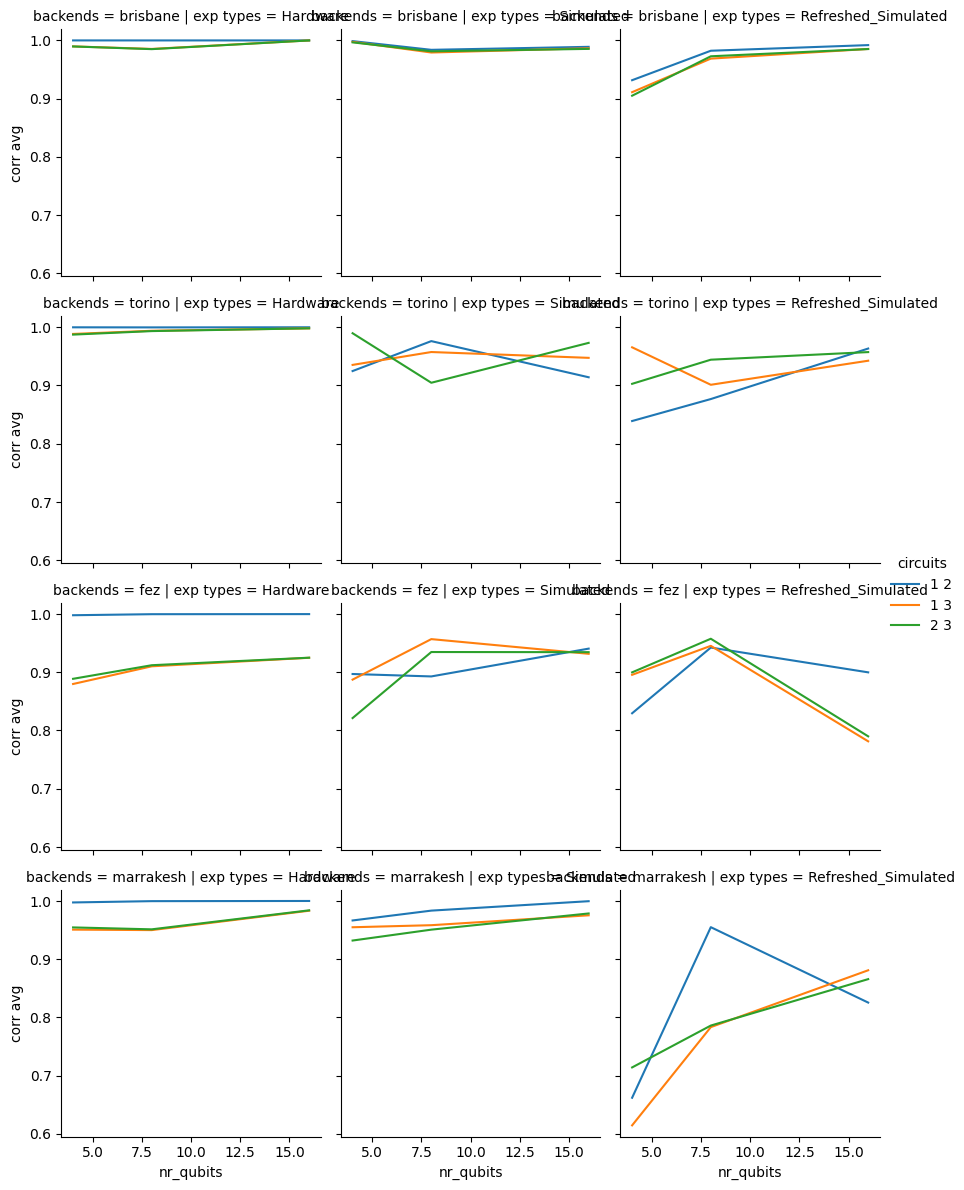

In [43]:
sns.relplot(
    data = pd.concat(cvc_dfs_p),
    x= 'nr_qubits',
    y = 'corr avg',
    row = 'backends',
    # col_wrap = 3,
    col = 'exp types',
    hue = 'circuits',
    kind = 'line',
    height = 3,
    aspect = 1
)